In [ ]:

import numpy as np
import pandas as pd

from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(42)


# This code is partly based on a tutorial which can be found here:
# https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding

In [ ]:
#Packages to import (regular expressions and pandas)

import re 
import pandas as pd 

from pathlib import Path
import gzip
import json

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Mount google colab to google drive so it can access files
from google.colab import drive
drive.mount('/content/drive')

#The huge gzipped JSON files ('NL_jobs.15.jsonl.gz') are located in this folder
cwd = '/content/drive/My Drive/Werkinzicht_Clyde/Notebooks/Experiments'

#Print the content of the folder
!ls '/content/drive/My Drive/Werkinzicht_Clyde/Notebooks/Experiments'

# set current working directory, This folder should only contain the huge json files.
%cd '/content/drive/My Drive/Werkinzicht_Clyde/Notebooks/Experiments'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Baseline Model (BOW Log. regression).ipynb'
 BERT_alt_deploy.ipynb
'BERT_Jads_Nikita- Clyde edit - hpartuning.ipynb'
 BOW_LSTM.ipynb
'Copy of Copy of BERT_alt _ hyperparamtuning.ipynb'
 CORPUSNL_jobs.15.jsonl.gz_JSON_splitted.tsv_1.tsv
 Cow
 COW_LSTM_hyperparamtuning.ipynb
 dev.gsheet
 dev.tsv
 df3_updated_clean.txt
 df3_updated.txt
 df4_updated_clean.txt
 df4_updated.txt
 Exp23_RNDSCV.csv
 Exp25_RNDSCV.csv
 Exp26_RNDSCV.csv
 Exp27_RNDSCV.csv
 Exp28_RNDSCV.csv
 Exp29_RNDSCV.csv
 Exp30_RNDSCV.csv
 Exp31_RNDSCV.csv
 Exp32_RNDSCV.csv
 Exp33_RNDSCV.csv
 Exp34_RNDSCV.csv
 Exp35_RNDSCV.csv
 Exp36_RNDSCV.csv
 fastText-0.1.0
 glove.6B
 glove.6B.zip
 glove.model
 model.h5
 model.json
 NL_Embedding
 NL_jobs.15.jsonl.gz_JSON_splitted.tsv
 temp
 tokenizer.pickle
 train.gsheet
 train.tsv
 v0.1.0.zip
 v0.1.0.zip.1
 v0.1.0.zip.2
 Word2Vec_LSTM_hyperparamtuning.ipynb
 Word_

In [ ]:
TRAIN_FILE = "train.tsv"
DEV_FILE = "dev.tsv"

print("TRAIN FILE: \t\t{}\nDEVELOPMENT FILE: \t{}".format(TRAIN_FILE, DEV_FILE))

TRAIN FILE: 		train.tsv
DEVELOPMENT FILE: 	dev.tsv


In [ ]:
# Load the data
test_full = pd.read_csv(TRAIN_FILE, sep = "\t")
dev_full = pd.read_csv(DEV_FILE, sep = "\t")

# Tirm the data to only one we need
test_trim = test_full[["Quality", "#1 String"]]
dev_trim = dev_full[["Quality", "#1 String"]]

# Seperate our data for training and testing
train_text = np.array(test_full["#1 String"])
train_target = np.array(test_full["Quality"])

test_text = np.array(dev_full["#1 String"])
test_target = np.array(dev_full["Quality"])

# Check our training and testing sets
print("Train-set size: ", len(train_text))
print("Test-set size:  ", len(test_text))

# Stack text for tokenization
data_text = np.hstack((train_text, test_text))
print("Shape of the stacked text: {}".format(data_text.shape))

Train-set size:  2240
Test-set size:   720
Shape of the stacked text: (2960,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_text)

print(vectorizer)

X_train = vectorizer.transform(train_text)
X_test  = vectorizer.transform(test_text)
X_train

print(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (1, 1216)	1
  (2, 1087)	1
  (2, 1743)	1
  (2, 2936)	1
  (2, 2941)	1
  (2, 3416)	1
  (3, 471)	1
  (3, 526)	1
  (3, 1068)	1
  (3, 1087)	1
  (3, 2939)	1
  (4, 273)	1
  (4, 1125)	1
  (4, 1678)	1
  (4, 2876)	1
  (5, 574)	1
  (5, 1580)	1
  (5, 2844)	1
  (5, 3416)	1
  (6, 263)	1
  (6, 531)	1
  (6, 1047)	2
  (6, 1580)	1
  (6, 2096)	1
  (6, 2189)	1
  :	:
  (2238, 1718)	1
  (2238, 2200)	1
  (2238, 2378)	1
  (2238, 2706)	1
  (2238, 2712)	1
  (2238, 3128)	1
  (2238, 3465)	1
  (2238, 3642)	1
  (2238, 3839)	1
  (2238, 3844)	1
  (2238, 3901)	1
  (2239, 378)	1
  (2239, 664)	1
  (2239, 892)	1


In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, LSTM, Bidirectional

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(dense1, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
param_grid = dict(dense1=[4, 8,16, 32]
                  )

In [ ]:

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                39430     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 39,441
Trainable params: 39,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

history = model.fit(X_train, train_target,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, test_target),
                    batch_size=128,
                    callbacks=[es])

Epoch 00018: early stopping


In [ ]:
threshold = 0.5
predicted = model.predict(X_train)

predicted = np.where(predicted > threshold, 1,0)


eval_predicted = model.predict(X_test)

eval_predicted = np.where(eval_predicted > threshold, 1,0)


In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sk

loss, accuracy = model.evaluate(X_train, train_target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))


precision = sk.precision_score(train_target, predicted)
print("Training Precision: ", precision)
recall = sk.recall_score(train_target, predicted)
print("Training recall: ", recall)
roc_auc = sk.roc_auc_score(train_target, predicted)
print("Training roc_auc: ", roc_auc)
f1 = sk.f1_score(train_target, predicted)
print("Training f1: ", f1)


loss, accuracy = model.evaluate(X_test, test_target, verbose=False)
print("Eval Accuracy: {:.4f}".format(accuracy))
print("Eval Loss: {:.4f}".format(loss))


precision = sk.precision_score(test_target, eval_predicted)
print("Eval Precision: ", precision)
recall = sk.recall_score(test_target, eval_predicted)
print("Eval recall: ", recall)
roc_auc = sk.roc_auc_score(test_target, eval_predicted)
print("Eval roc_auc: ", roc_auc)
f1 = sk.f1_score(test_target, eval_predicted)
print("Eval f1: ", f1)

Training Accuracy: 0.9746
Training Loss: 0.1432
Training Precision:  0.9635467980295567
Training recall:  0.9799599198396793
Training roc_auc:  0.9750846298071182
Training f1:  0.9716840536512668
Eval Accuracy: 0.8069
Eval Loss: 0.4824
Eval Precision:  0.7018633540372671
Eval recall:  0.8401486988847584
Eval roc_auc:  0.8136441942317362
Eval f1:  0.7648054145516073


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

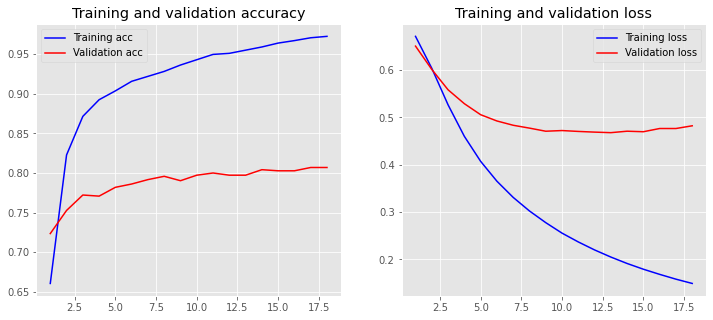

In [ ]:
plot_history(history) 

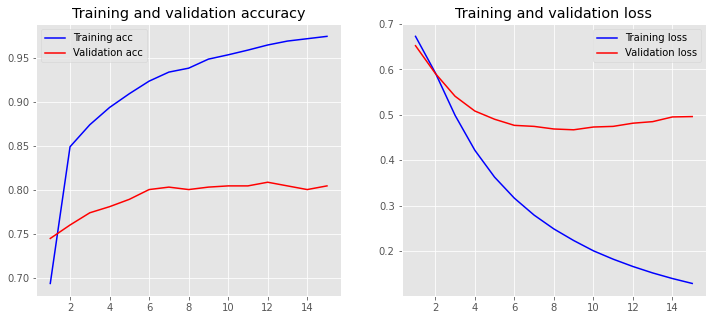

In [ ]:
plot_history(history) 

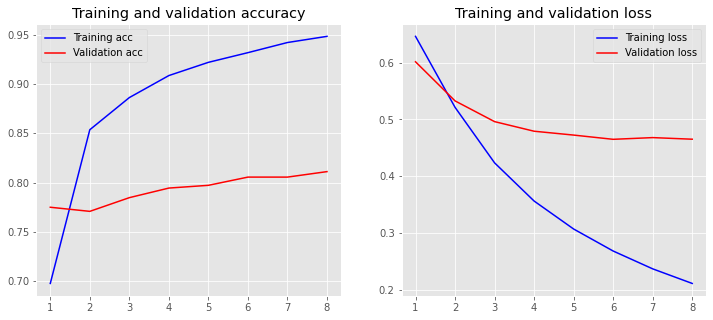

In [ ]:
plot_history(history) 

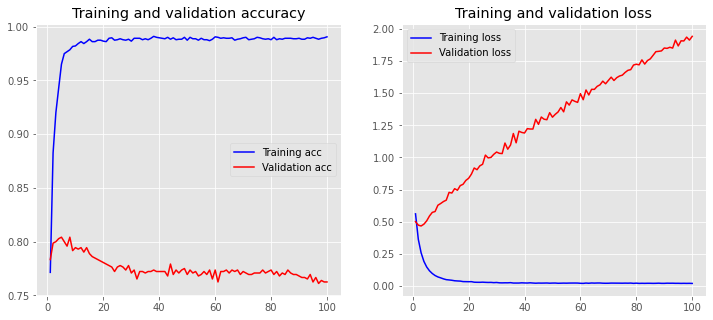

In [ ]:
plot_history(history) 

We can see we overfitted drastically, so lets it again with less epochs